In [1]:
%matplotlib inline
%load_ext autoreload
! pip install git+https://github.com/avivajpeyi/pspline_psd.git -q

# Example: AR process

First, lets generate some data from an AR process and plot it.

In [2]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.fft import fft
from pspline_psd.example_datasets.ar_data import generate_ar_timeseries, plot_ar_spectrogram_psd
from pspline_psd.sample.fit_data_with_pspline_model import fit_data_with_pspline_model
from pspline_psd.plotting import set_plotting_style
from pspline_psd.fourier_methods import get_periodogram


np.random.seed(42)

set_plotting_style()



def plot_spline_model_and_data(data, psd_quants, separarte_y_axis=False):
    psd, psd_p05, psd_p95 = psd_quants[0, :], psd_quants[1, :], psd_quants[2, :]
    n, newn = len(data), len(psd)
    periodogram = np.abs(np.power(fft(data), 2) / (2 * np.pi * n))[0:newn]
    psd_x = np.linspace(0, 3.14, newn)

    fig, ax = plt.subplots(1,1, figsize=(5,3))

    ax.scatter(psd_x, periodogram, color="k", label="Data", s=0.75)

    if separarte_y_axis:
        ax1 = ax.twinx()
    else:
        ax1 = ax
    ax1.plot(psd_x, psd, color="tab:orange", alpha=0.5, label="Posterior")
    ax1.fill_between(
        psd_x, psd_p05, psd_p95, color="tab:orange", alpha=0.2, linewidth=0.0
    )

    ax.grid(False)
    ax.legend(markerscale=5, frameon=False)
    ax.set_ylabel("PSD")
    ax.set_xlabel("Freq")
    plt.tight_layout()
    plt.minorticks_off()
    return fig


## Example 1: AR(3)

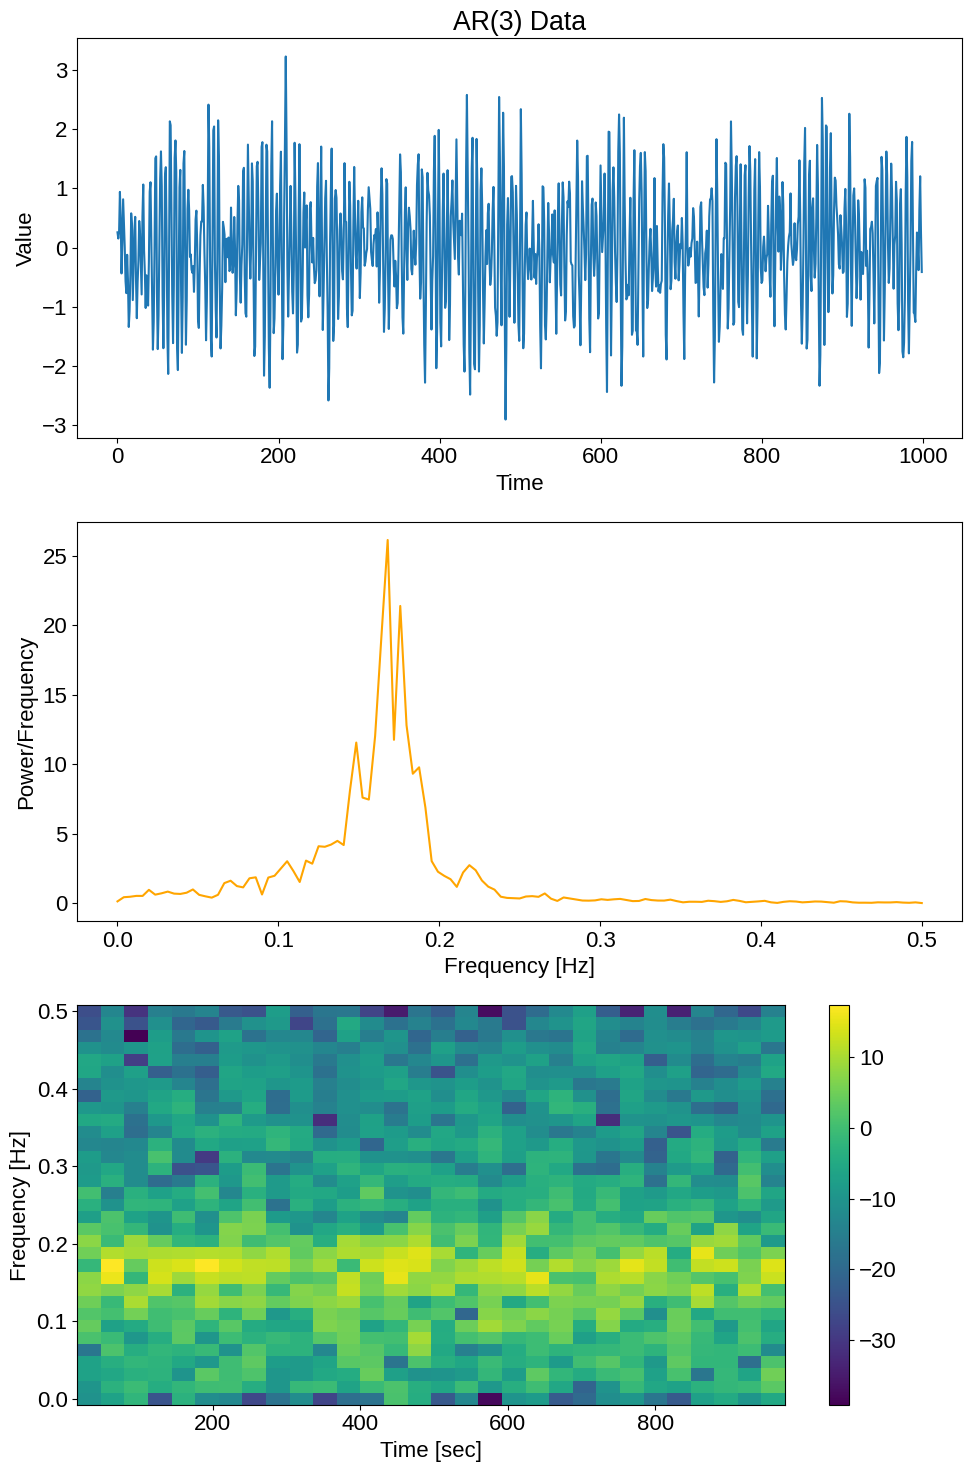

In [3]:
data = generate_ar_timeseries(order=3, n_samples=1000)
fig = plot_ar_spectrogram_psd(data, title='AR(3) Data')


MCMC sampling:   0%|          | 0/5000 [00:00<?, ?it/s]

Generating PSD posterior:   0%|          | 0/4000 [00:00<?, ?it/s]

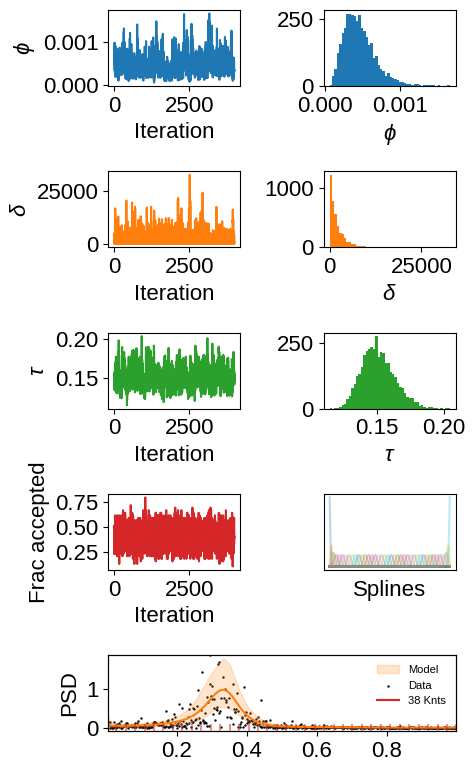

In [4]:
pdgrm = get_periodogram(timeseries=data)
mcmc = fit_data_with_pspline_model(
    data=pdgrm, Ntotal=5000, burnin=1000, degree=3, eqSpacedKnots=True, compute_psds=True
)
fig = mcmc.make_summary_plot()

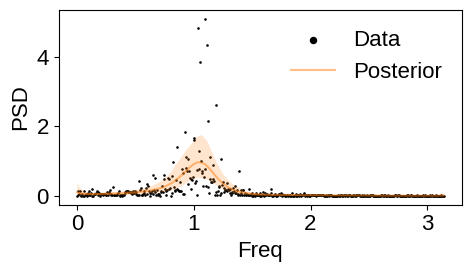

In [6]:
fig = plot_spline_model_and_data(data, mcmc.psd_quantiles)

## Example 2: AR(4)

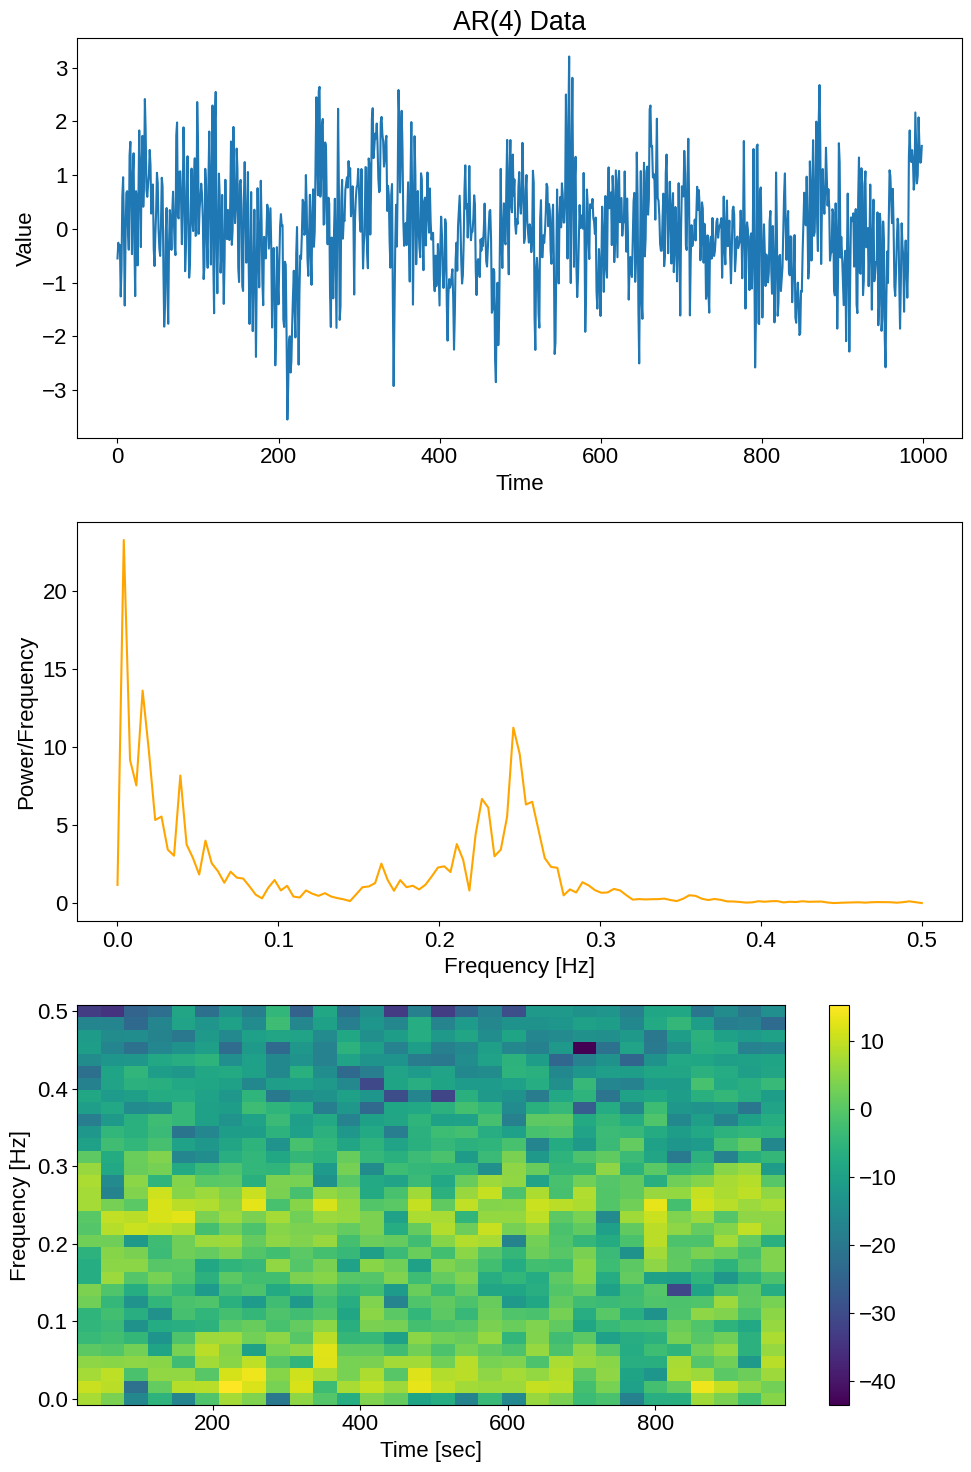

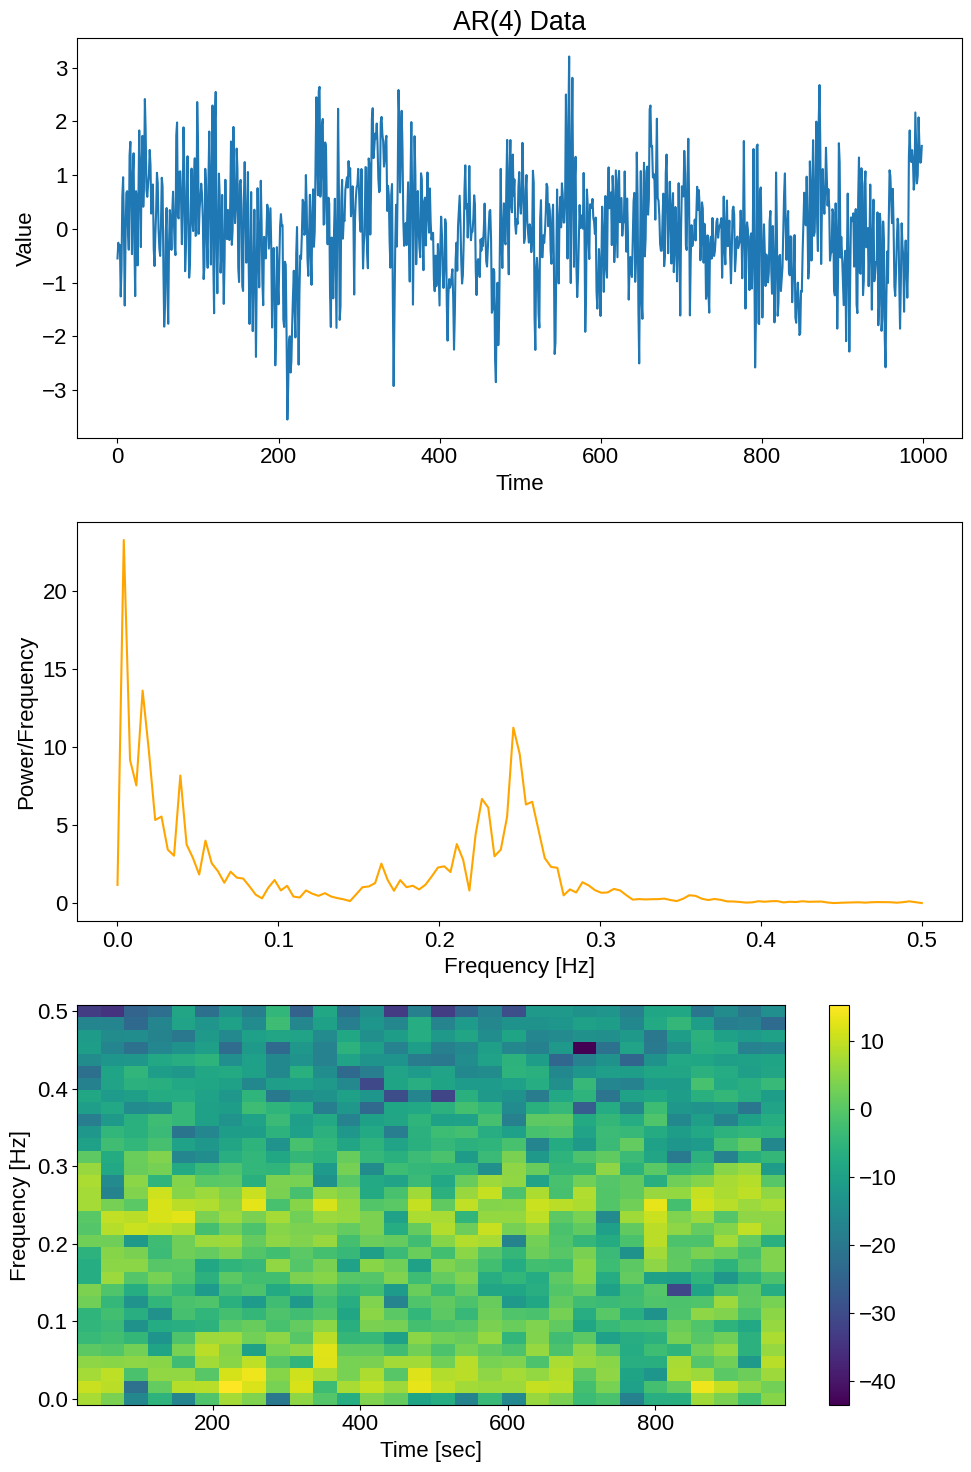

In [7]:
data = generate_ar_timeseries(order=4, n_samples=1000)
fig = plot_ar_spectrogram_psd(data, title='AR(4) Data');
fig

## Equally spaced knots

MCMC sampling:   0%|          | 0/5000 [00:00<?, ?it/s]

Generating PSD posterior:   0%|          | 0/4000 [00:00<?, ?it/s]

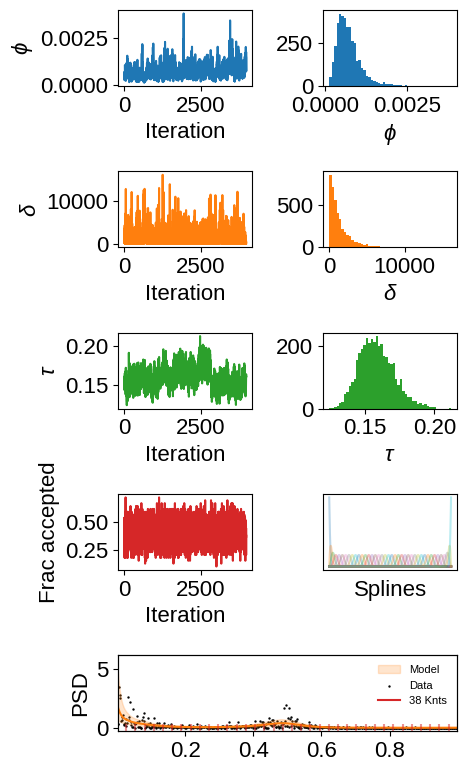

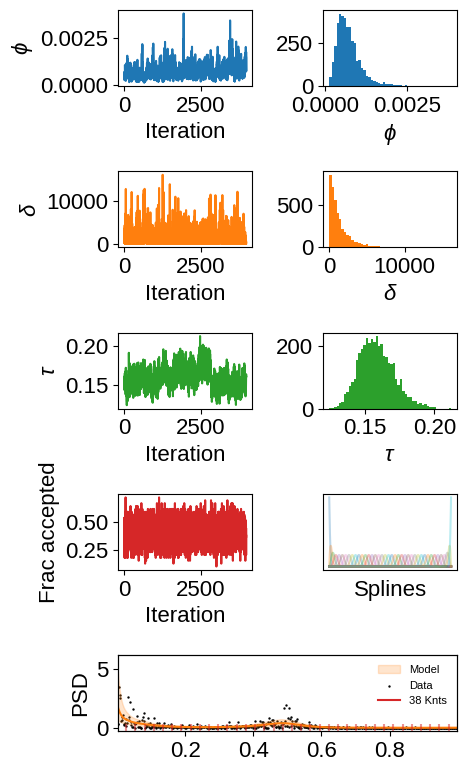

In [8]:
pdgrm = get_periodogram(timeseries=data)
mcmc = fit_data_with_pspline_model(
    data=pdgrm, Ntotal=5000, burnin=1000, degree=3, eqSpacedKnots=True, compute_psds=True
)
mcmc.make_summary_plot()

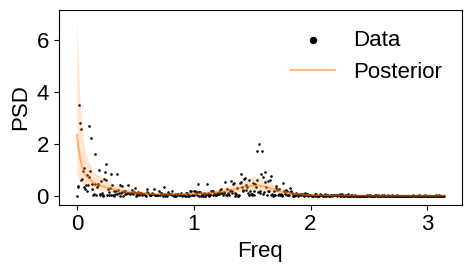

In [9]:
fig = plot_spline_model_and_data(data, mcmc.psd_quantiles)

## Non-equally spaced knots

MCMC sampling:   0%|          | 0/5000 [00:00<?, ?it/s]

Generating PSD posterior:   0%|          | 0/4000 [00:00<?, ?it/s]

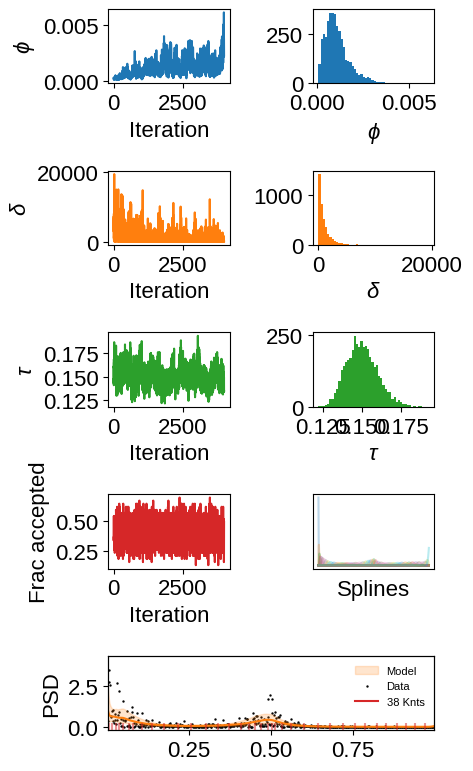

In [10]:
pdgrm = get_periodogram(timeseries=data)
mcmc = fit_data_with_pspline_model(
    data=pdgrm, Ntotal=5000, burnin=1000, degree=3, eqSpacedKnots=False, compute_psds=True
)
fig = mcmc.make_summary_plot()

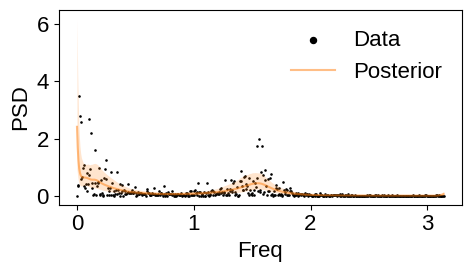

In [11]:
fig = plot_spline_model_and_data(data, mcmc.psd_quantiles)